# Libraries

In [1]:
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

# Load the Data

In [4]:
data = pd.read_csv('/content/NFLX.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [5]:
data.drop('Date', axis = 1, inplace = True)
data

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


# Look at The Data

In [6]:
# Take a look at the form (shape) of the data (Dimensions of Dataset).
data.shape

(1009, 6)

In [7]:
# Look at the columns names.
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# Let's check the data, to see if there is duplicate data or not
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1004    False
1005    False
1006    False
1007    False
1008    False
Length: 1009, dtype: bool

In [9]:
# We are looking for duplicate rows.
data.duplicated().sum()

0

In [10]:
# Checking for missing values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# Use the .info() method to find out how many entries there are.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.4 KB


In [12]:
# We are looking for types of the columns in the data.
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
# To know and see the number of components or the number of sample of each column in this data.
data.nunique()

Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

# Data Visualization

In [14]:
df = data.copy()
df

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [15]:
# Matrix form for correlation data
drrr= data.corr()
drrr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


<Axes: >

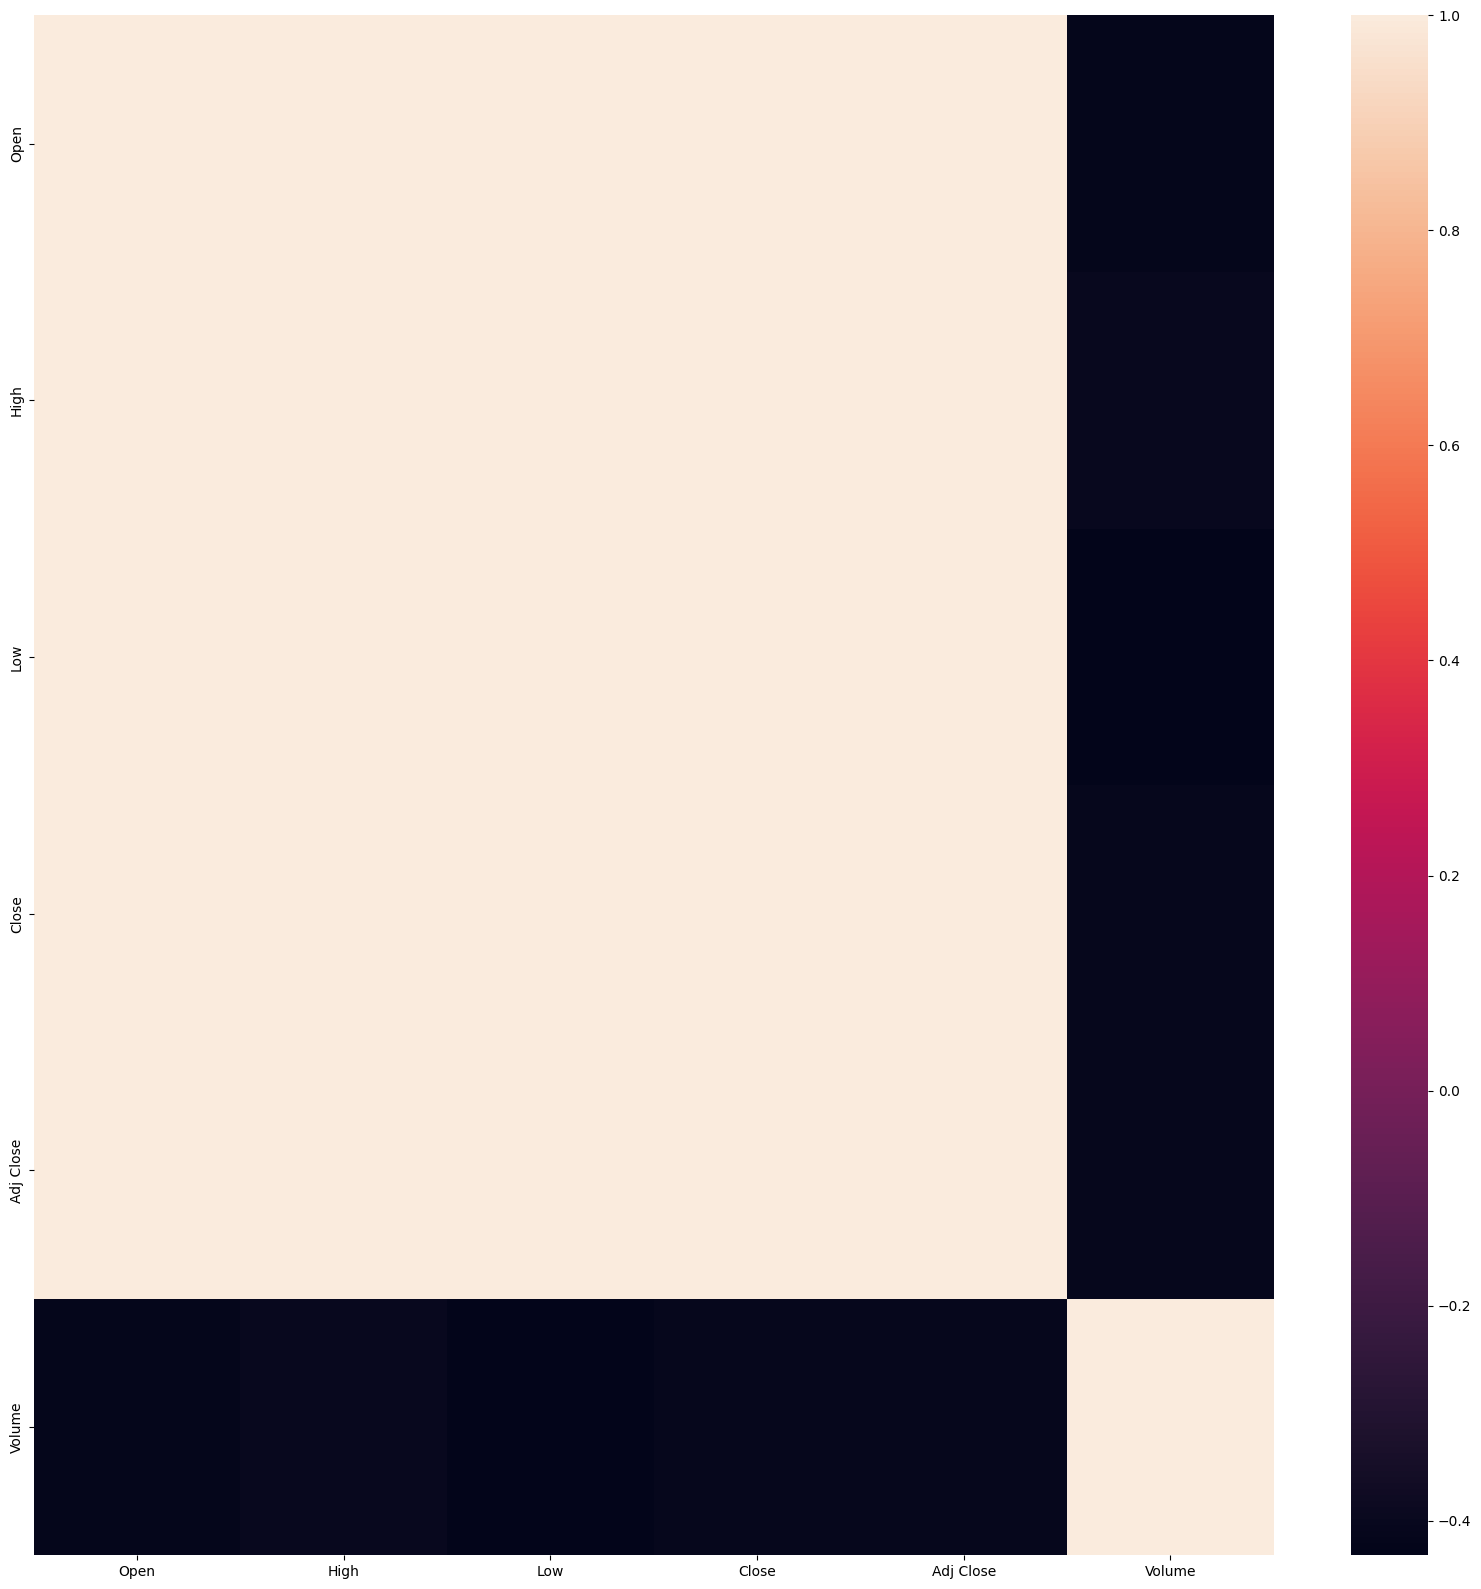

In [16]:
# We here looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr)

<Axes: >

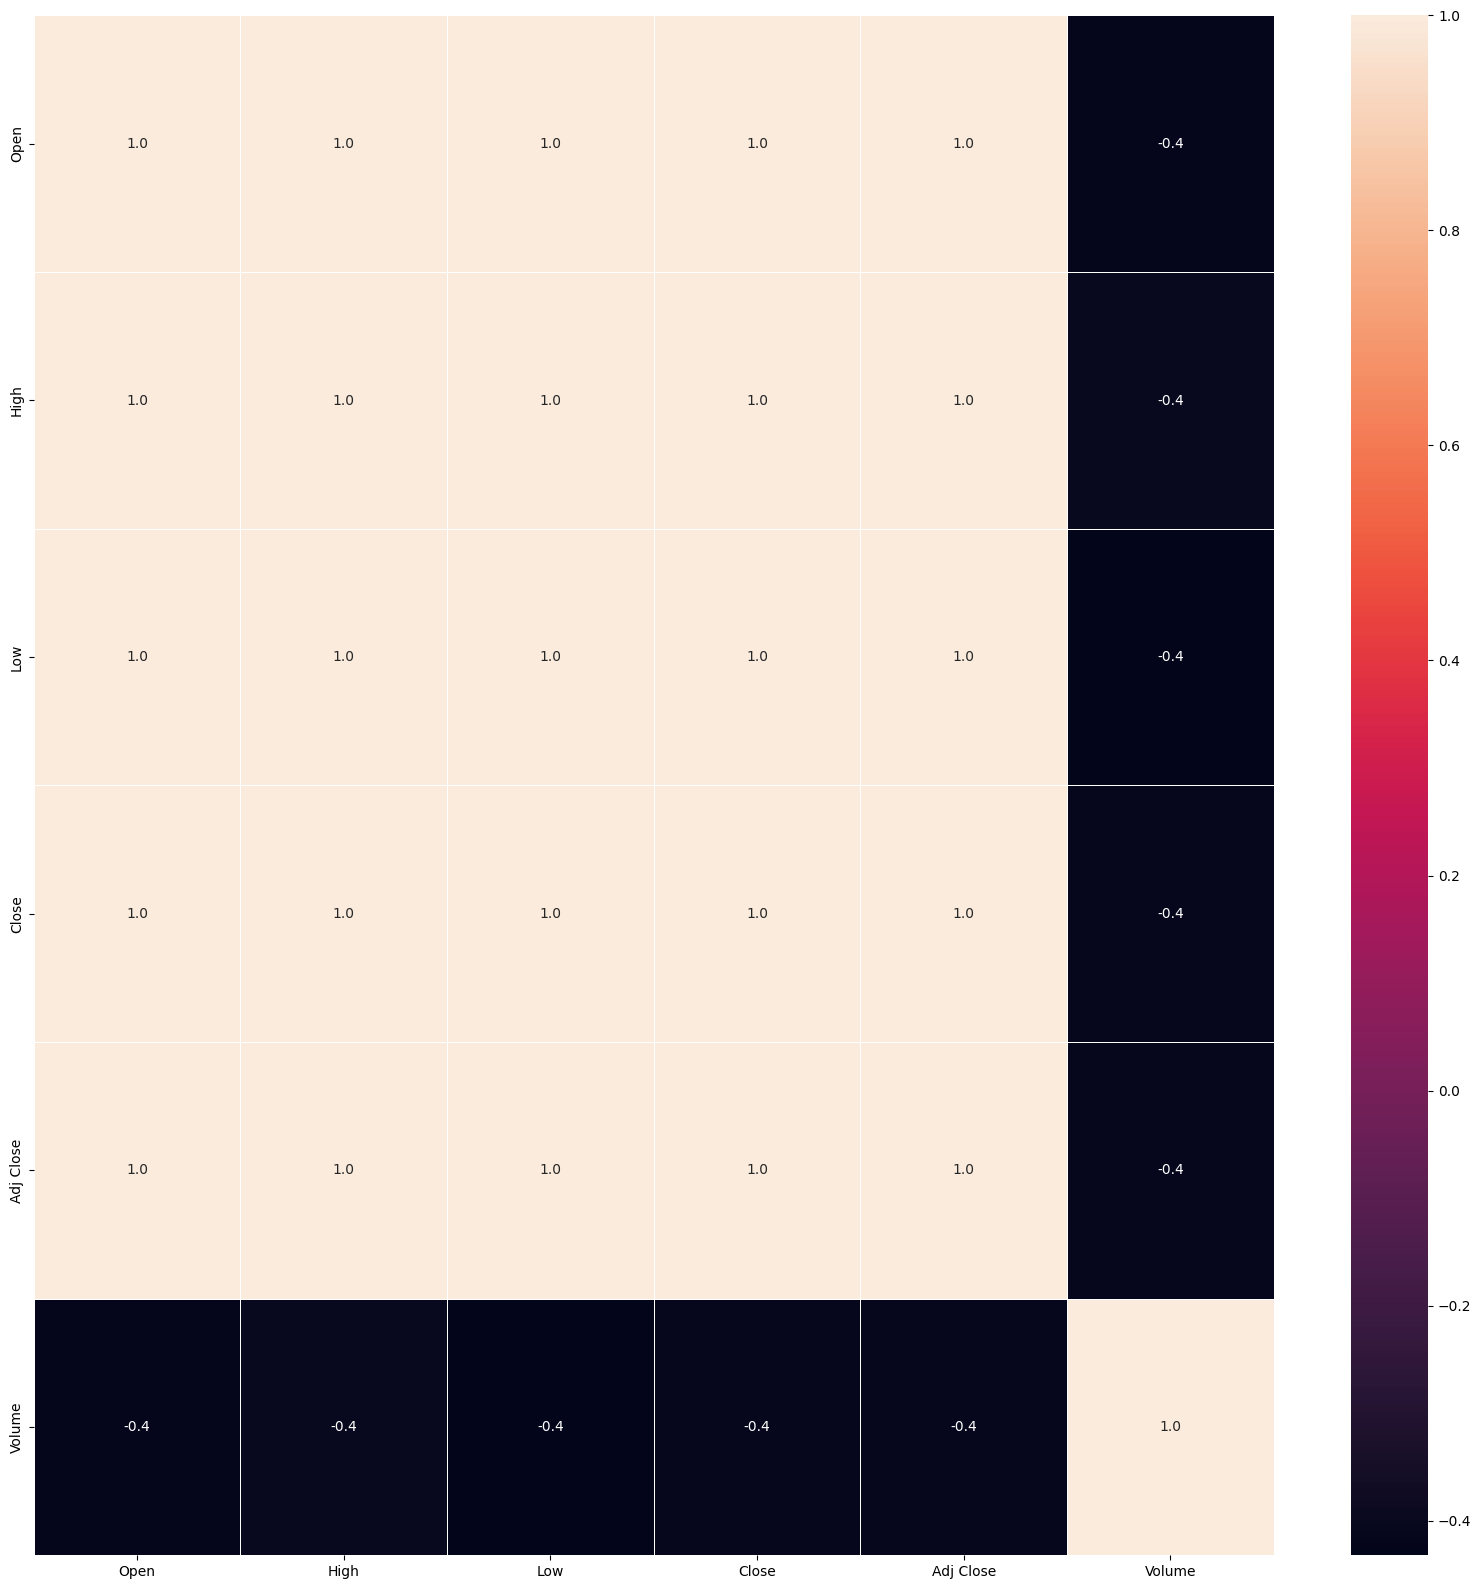

In [17]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(drrr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

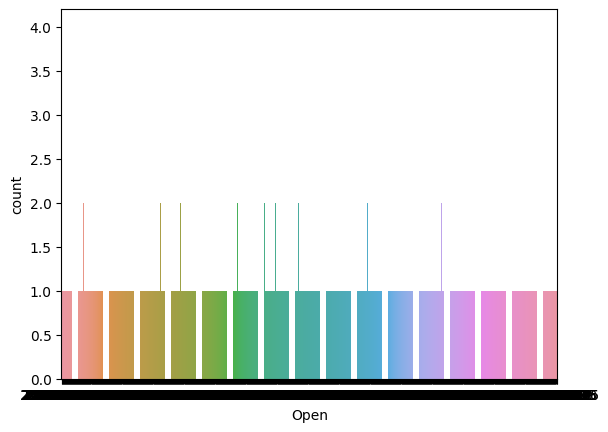

<Figure size 2000x2000 with 0 Axes>

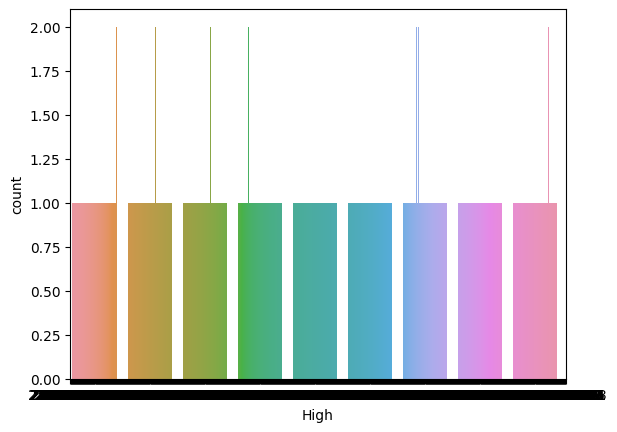

<Figure size 2000x2000 with 0 Axes>

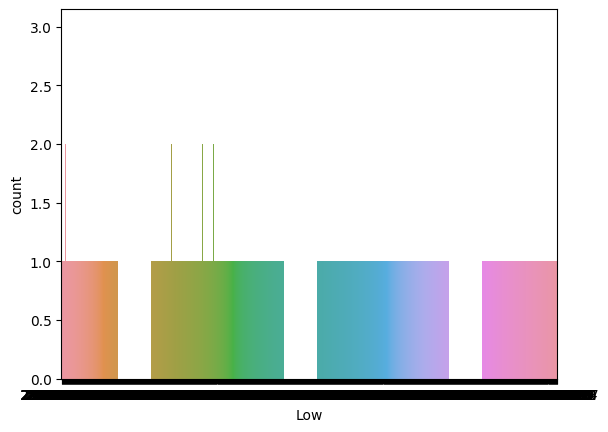

<Figure size 2000x2000 with 0 Axes>

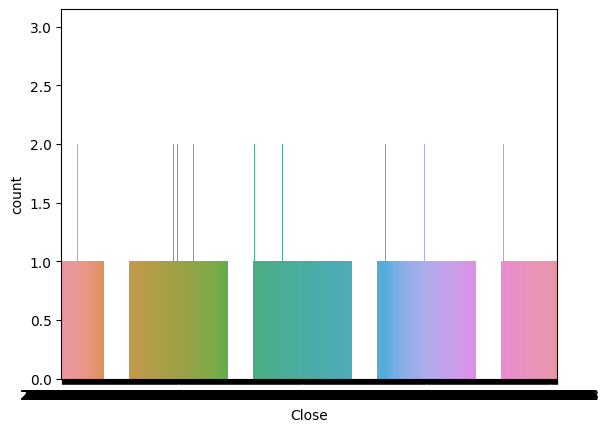

<Figure size 2000x2000 with 0 Axes>

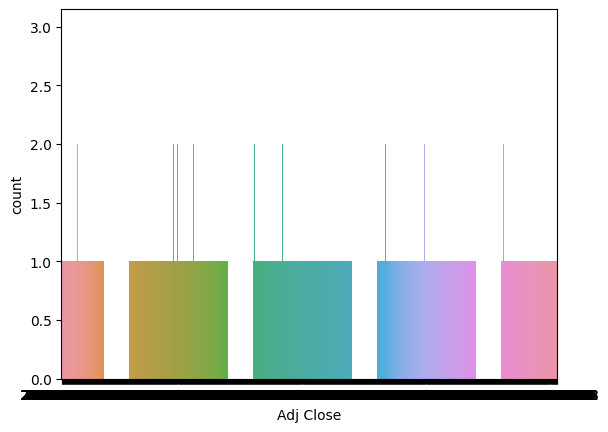

<Figure size 2000x2000 with 0 Axes>

In [18]:
# Original data.
for i in df.loc[:, ~df.columns.isin(["Date", "Volume"])]:
    f = sns.countplot(x=df[i]);
    plt.figure(figsize=(20,20))
    plt.show()

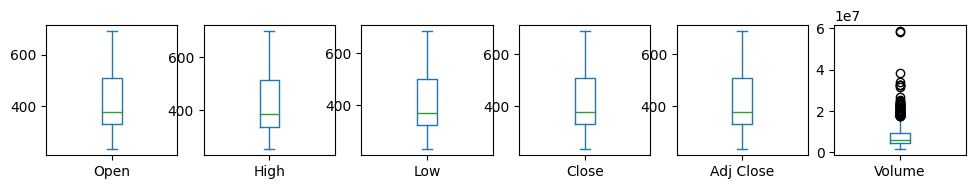

In [19]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))
plt.show()

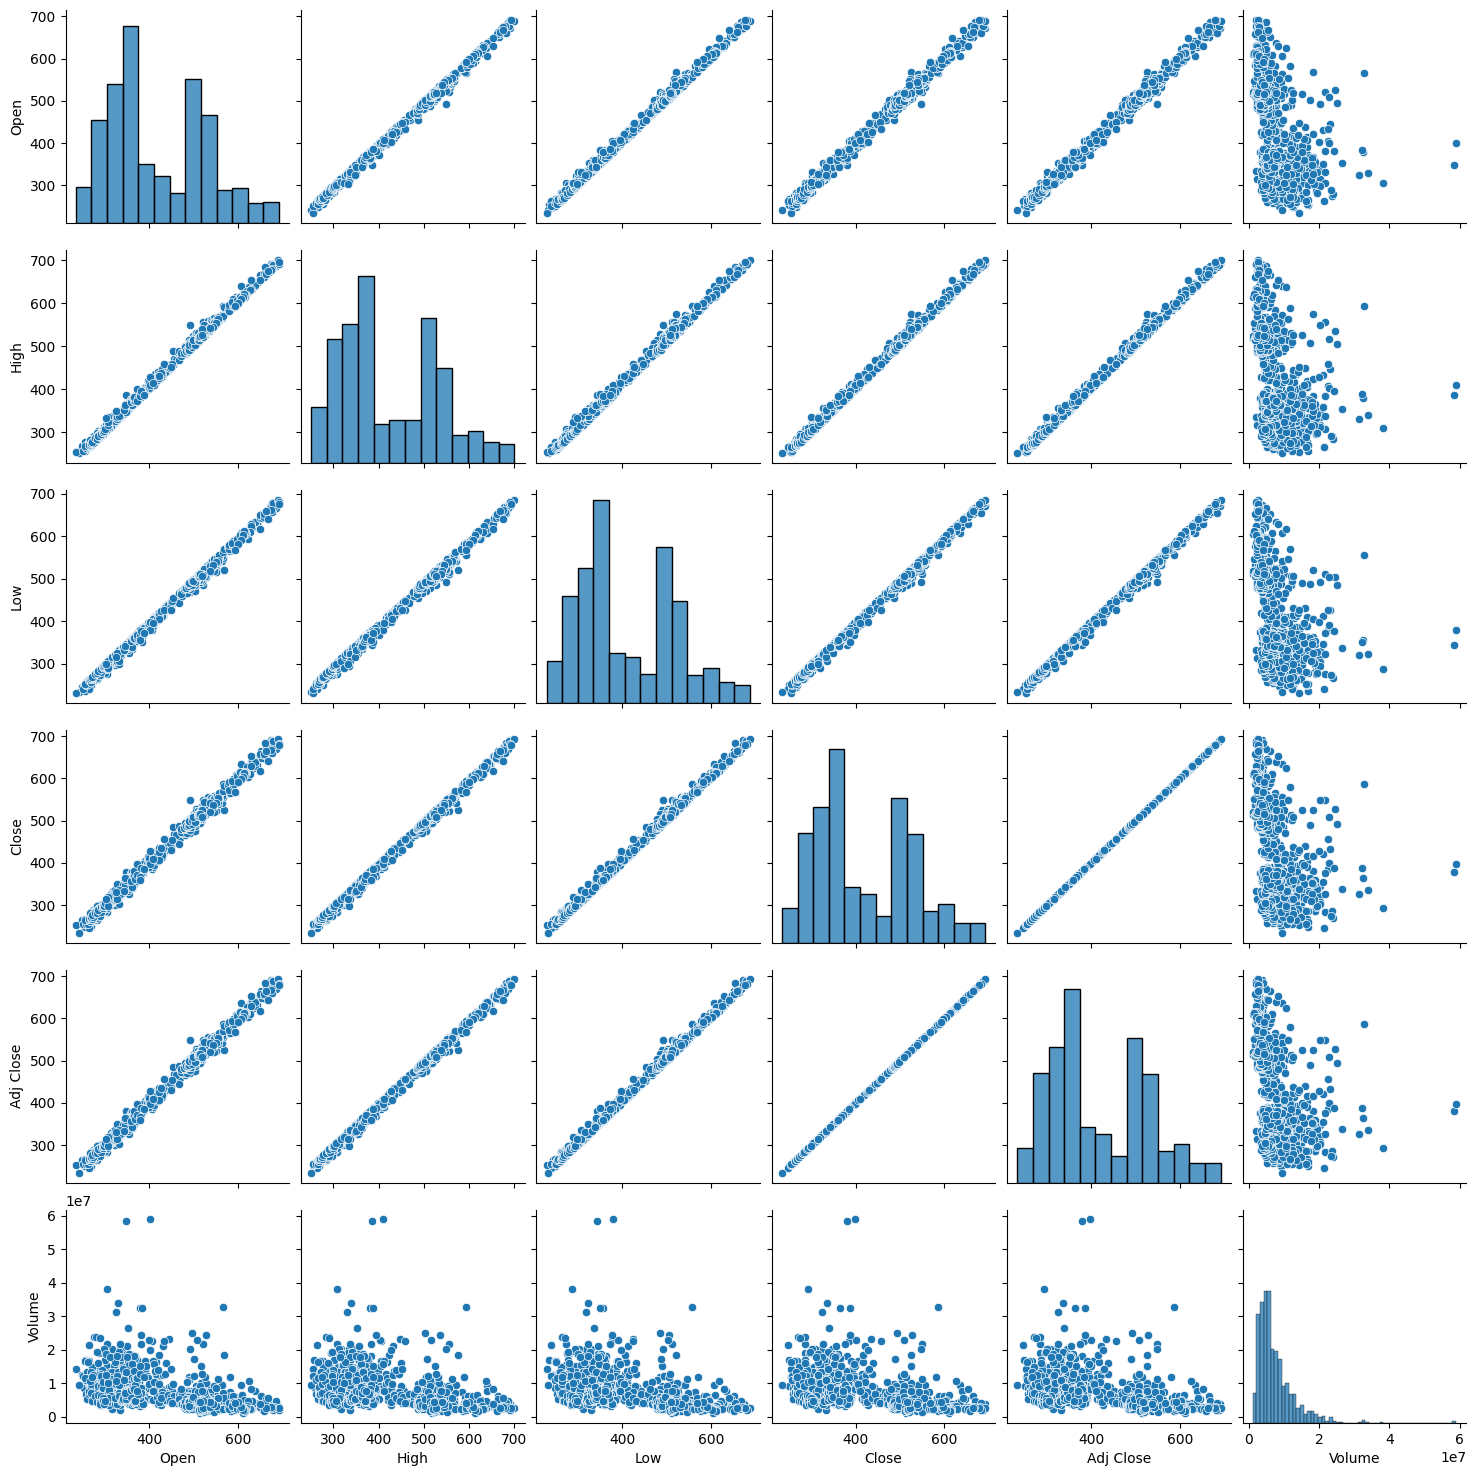

In [20]:
sns.pairplot(df)

# Splitting

In [21]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [22]:
train_data.shape, test_data.shape

((807, 6), (202, 6))

# Preprocessing

## Scale

In [23]:
scaler = MinMaxScaler()

In [24]:
scalerr = MinMaxScaler()

In [25]:
train_data_scaled = scaler.fit_transform(train_data)
train_data_scaled

array([[0.17860959, 0.14960206, 0.16969522, 0.17439697, 0.17439697,
        0.14992077],
       [0.28898633, 0.26224888, 0.27997145, 0.27364546, 0.27364546,
        0.10854764],
       [0.30501932, 0.28738923, 0.30877797, 0.30631203, 0.30631203,
        0.06049766],
       ...,
       [0.67691906, 0.66287127, 0.6698401 , 0.66183209, 0.66183209,
        0.02491101],
       [0.09626332, 0.07914141, 0.10282939, 0.10512013, 0.10512013,
        0.08610638],
       [0.33054124, 0.33309287, 0.3316983 , 0.35996755, 0.35996755,
        0.1189803 ]])

In [26]:
test_data_scaled = scaler.transform(test_data)
test_data_scaled

array([[0.57747095, 0.5857591 , 0.59624089, 0.60416715, 0.60416715,
        0.07499163],
       [0.59230423, 0.58091143, 0.56955252, 0.57150058, 0.57150058,
        0.08023833],
       [0.5964488 , 0.59491335, 0.59831441, 0.58493084, 0.58493084,
        0.05016219],
       ...,
       [0.11825144, 0.10166625, 0.09696552, 0.09081345, 0.09081345,
        0.19982609],
       [0.28200602, 0.27101986, 0.29424097, 0.29827134, 0.29827134,
        0.04948878],
       [0.2564841 , 0.23776243, 0.25747474, 0.25381769, 0.25381769,
        0.14632288]])

In [27]:
#Creating a data structure with 50 timesteps and 1 output, timestep is our memory size
#In this function we are creating our train data with 50x stock price and next one is 1 scrolled data.
#for example X_tain[0] will be our data's 0 to 49. values
#X_train[1] will be our data's 1 to 50. values
#this 50 is our memory size, it will remember this way what we had before.
X_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,len(train_data_scaled)):
    X_train.append(train_data_scaled[i-timesteps:i,0])
    y_train.append(train_data_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [28]:
real_stock_price=test_data.loc[:,["Open"]].values

# Model

## Recurrent Neural Network (RNN)

In [29]:
regressor=Sequential()
#Adding the first RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0,2))

#Adding the second RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))

#Adding the third RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))

#Adding the third RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
regressor.add(Dropout(0,2))

#Adding the fourth RNN Layer and some Dropout Regularisation
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0,2))

#Adding the output Layer
regressor.add(Dense(units=1))

In [30]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50, 50)            5

In [31]:
#Compling the RNN
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [32]:
#Fitting the RNN to the Training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
24/24 [==============================] - 9s 118ms/step - loss: 0.1417
Epoch 2/50
24/24 [==============================] - 2s 83ms/step - loss: 0.0593
Epoch 3/50
24/24 [==============================] - 2s 64ms/step - loss: 0.0578
Epoch 4/50
24/24 [==============================] - 2s 65ms/step - loss: 0.0613
Epoch 5/50
24/24 [==============================] - 2s 66ms/step - loss: 0.0618
Epoch 6/50
24/24 [==============================] - 2s 63ms/step - loss: 0.0575
Epoch 7/50
24/24 [==============================] - 2s 105ms/step - loss: 0.0606
Epoch 8/50
24/24 [==============================] - 2s 81ms/step - loss: 0.0582
Epoch 9/50
24/24 [==============================] - 2s 63ms/step - loss: 0.0587
Epoch 10/50
24/24 [==============================] - 2s 64ms/step - loss: 0.0612
Epoch 11/50
24/24 [==============================] - 2s 63ms/step - loss: 0.0589
Epoch 12/50
24/24 [==============================] - 2s 67ms/step - loss: 0.0592
Epoch 13/50
24/24 [================

In [33]:
dataset_total=pd.concat((train_data["Open"],test_data["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(train_data)-timesteps:].values.reshape(-1,1)
inputs=scalerr.fit_transform(inputs)

In [34]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_data_scaled)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scalerr.inverse_transform(predicted_stock_price)#we had scaled between 0-1 data, inversing it

7/7 [==============================] - 1s 21ms/step


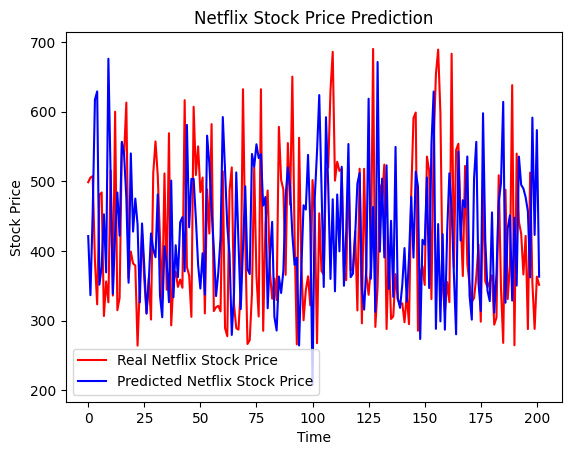

In [35]:
#visualising
plt.plot(real_stock_price,color="red",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Long Short Term Memory (LSTM)

In [36]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50, 50)           

In [38]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [39]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
24/24 [==============================] - 18s 189ms/step - loss: 0.0871
Epoch 2/10
24/24 [==============================] - 5s 197ms/step - loss: 0.0623
Epoch 3/10
24/24 [==============================] - 4s 168ms/step - loss: 0.0609
Epoch 4/10
24/24 [==============================] - 5s 205ms/step - loss: 0.0608
Epoch 5/10
24/24 [==============================] - 4s 181ms/step - loss: 0.0591
Epoch 6/10
24/24 [==============================] - 4s 166ms/step - loss: 0.0600
Epoch 7/10
24/24 [==============================] - 5s 216ms/step - loss: 0.0596
Epoch 8/10
24/24 [==============================] - 4s 179ms/step - loss: 0.0599
Epoch 9/10
24/24 [==============================] - 4s 167ms/step - loss: 0.0602
Epoch 10/10
24/24 [==============================] - 7s 302ms/step - loss: 0.0605


In [40]:
dataset_total=pd.concat((train_data["Open"],test_data["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(test_data)-timesteps:].values.reshape(-1,1)
inputs=scalerr.transform(inputs)

In [41]:
#prediction
X_test=[]
for i in range(timesteps,timesteps+len(test_data)):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=model.predict(X_test)
predicted_stock_price=scalerr.inverse_transform(predicted_stock_price)#we had scaled between 0-1 data, inversing it

7/7 [==============================] - 3s 44ms/step


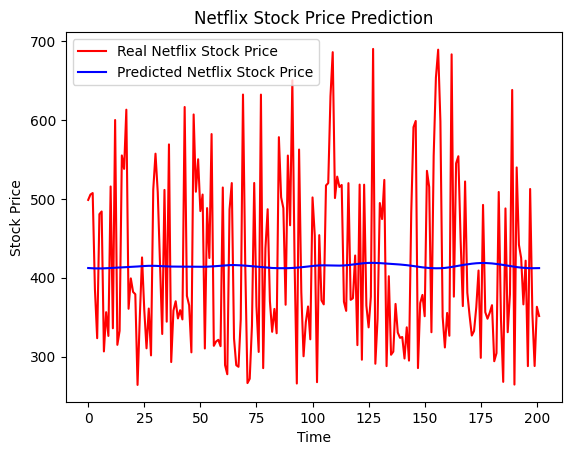

In [42]:
#visualising
plt.plot(real_stock_price,color="red",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()